# Aula 1

## Instalando o qiskit

In [2]:
pip install -U qiskit==0.36.2

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.7/198.7 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.4/37.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=6d0ad4dcf194122cadf259a2485d0893232692f4cb3f0846c9702fe0d99a39c8
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


## Conectando com o IBMQ

In [4]:
import qiskit

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
# Copie se API Token no IBMQ e cole aqui
qiskit.IBMQ.save_account('ade2e1cd8926fee57b535ff0761ddac06ce27b6ea7ea0ecb60121d873ccf19578850d46431bbb002e5a64db18657e028fd17ae71b73ce25c57002e2ff579eeb6', overwrite = True)

# Execute esse comando uma vez só
qiskit.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

## Criando circuitos quânticos

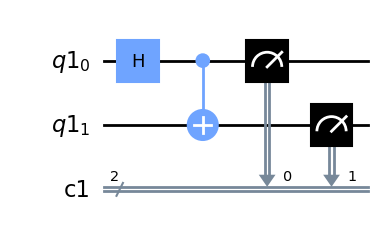

In [9]:
from qiskit import *

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.draw(output='mpl')

## Simulação

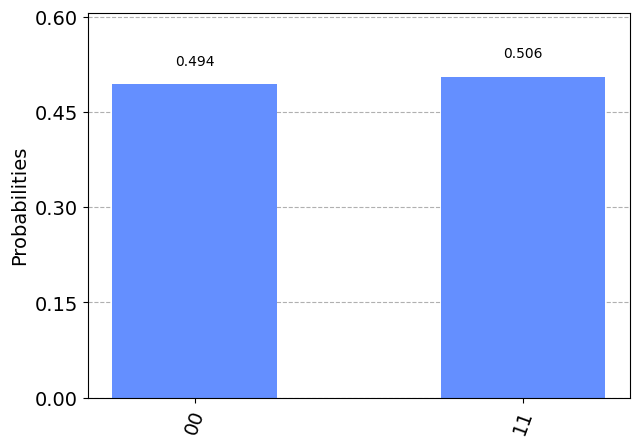

In [10]:
simulator = Aer.get_backend('qasm_simulator')

nshots = 8192 # número de "prepara-e-mede"

job = execute(qc, backend = simulator, shots = nshots)

from qiskit.tools.visualization import plot_histogram
plot_histogram(job.result().get_counts(qc))

In [11]:
counts = job.result().get_counts(qc)
counts

{'11': 4142, '00': 4050}

In [12]:
counts['00']

4050

In [13]:
# probabilidade
p00 = 0; p01 = 0; p10 = 0; p11 = 0
for j in (0,2):
    for k in (0,2):
        if '00' in counts:
            p00 = counts['00']/nshots
        if '01' in counts:
            p01 = counts['01']/nshots
        if '10' in counts:
            p10 = counts['10']/nshots
        if '11' in counts:
            p11 = counts['11']/nshots
p00, p01, p10, p11

(0.494384765625, 0, 0, 0.505615234375)

## Experimento

In [ ]:
device = provider.get_backend('ibm_nairobi')
from qiskit.tools.monitor import job_monitor

job = execute(qc, backend = device, shots = nshots)
job_monitor(job)

Job Status: job has successfully run


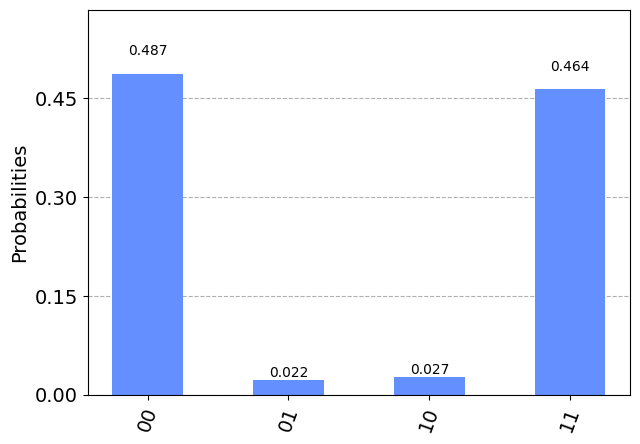

In [ ]:
plot_histogram(job.result().get_counts(qc))

In [ ]:
counts = job.result().get_counts(qc)
counts

{'10': 218, '00': 3993, '11': 3804, '01': 177}

In [ ]:
counts['00']

3993

In [ ]:
# probabilidade
p00 = 0; p01 = 0; p10 = 0; p11 = 0
for j in (0,2):
    for k in (0,2):
        if '00' in counts:
            p00 = counts['00']/nshots
        if '01' in counts:
            p01 = counts['01']/nshots
        if '10' in counts:
            p10 = counts['10']/nshots
        if '11' in counts:
            p11 = counts['11']/nshots
p00, p01, p10, p11

(0.4874267578125, 0.0216064453125, 0.026611328125, 0.46435546875)